## Simple Linear Regression

In [50]:
import pandas as pd
import numpy as np
import os
from numpy import random
import scipy 
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm ,t
import seaborn as sns
import pylab
from pylab import legend,plot,show,title,xlabel,ylabel
from random import choice
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import proportion  as ssp
from scipy.stats import chisquare
from scipy.stats import chi2_contingency


from sklearn.model_selection import train_test_split

In [51]:
df = pd.read_excel('CDAC_Databook.xlsx', sheet_name='stackloss')

In [52]:
df.head()

,AirFlow,WaterTemp,AcidConc,StackLoss
0,80,27,89,42
1,80,27,88,37
2,75,25,90,37
3,62,24,87,28
4,62,22,87,18


In [53]:
df.corr()

,AirFlow,WaterTemp,AcidConc,StackLoss
AirFlow,1.000000,0.781852,0.500143,0.919663
WaterTemp,0.781852,1.000000,0.390940,0.875504
AcidConc,0.500143,0.390940,1.000000,0.399830
StackLoss,0.919663,0.875504,0.399830,1.000000


In [54]:
np.cov(df['AirFlow'], df['WaterTemp'])

array([[84.05714286, 22.65714286],
       [22.65714286,  9.99047619]])

- 84.05714286 -->Co-variance Airflow with Airflow
- 22.65714286 -->Co-variance Airflow with Watertemp
- 9.99047619 -->Co-variance Watertemp with Watertemp

In [56]:
np.var(df['AirFlow'])

80.0544217687075

In [57]:
np.var(df['WaterTemp'])

9.514739229024945

- Co-variance of the x1, x2, is equal to variance

In [59]:
np.corrcoef(df['AirFlow'], df['WaterTemp'])

array([[1.        , 0.78185233],
       [0.78185233, 1.        ]])

In [61]:
df_faith = pd.read_excel('CDAC_Databook.xlsx', sheet_name = 'faithful')

In [62]:
df_faith.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


Text(0, 0.5, 'Eruptions')

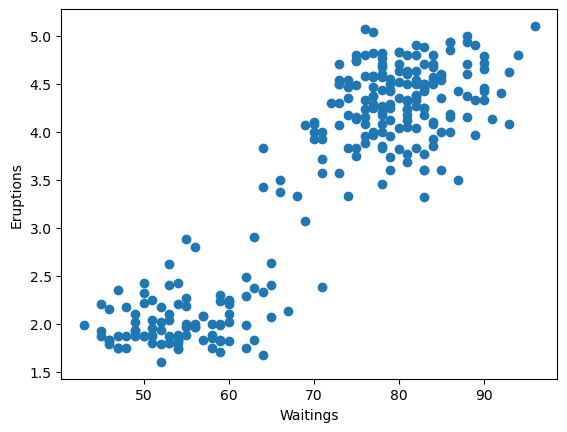

In [63]:
plt.scatter(df_faith['waiting'], df_faith['eruptions'])
plt.xlabel('Waitings')
plt.ylabel('Eruptions')

In [64]:
np.corrcoef(df_faith['waiting'], df_faith['eruptions'])

array([[1.        , 0.90081117],
       [0.90081117, 1.        ]])

In [65]:
x_train = df_faith['waiting']
y_train = df_faith['eruptions']
x_train = sm.add_constant(x_train, prepend=False)

- we are adding 'C' in the line equation (y = mx + C)

In [67]:
df_faith.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [68]:
x_train.head()

,waiting,const
0,79,1.0
1,54,1.0
2,74,1.0
3,62,1.0
4,85,1.0


In [69]:
mod1 = sm.OLS(y_train, x_train).fit() # OLS -> Ordinary Least Squared
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          8.13e-100
Time:                        09:09:19   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
waiting        0.0756      0.002     34.089      0.0

- We have calculated to get least squared value for 'm' and 'c' for the Equation:
    - eruptions = 0.0756 * waiting - 1.8740

In [71]:
0.90081117**2 # R-squared = square of correlation coefficient (Only in Linear Regression) ;; coefficient of determination - R

0.8114607639967689

- Adj Rsquared charges a penalty for the number of predictors used in the model.
- As the number of predictors increase, the difference between r-squared and adjusted r-squared will also increase.

- F-statistic: 1162. ------------------> test statistic
- Prob (F-statistic): 8.13e-100------> p-value
- Since p- value < 0.05 , we reject null hypothesis, which helps us in further taking decisions for it. (Our model is useful)
- [0.025      0.975] is the range , and since 0 is not between them, it confirms that Null Hypothesis is REJECTED

In [94]:
df_faith.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [126]:
x_train, x_test, y_train, y_test = train_test_split(df_faith['waiting'], df_faith['eruptions'], test_size=0.2, random_state=20)
# train_test_split(<input columns>, <name of output column>, test_size = 0.2 -> training = 80%, testing = 20%)

In [128]:
df_faith.shape

(272, 2)

In [130]:
df_faith.head(3)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74


In [132]:
x_train.head(3)

58     77
184    51
15     52
Name: waiting, dtype: int64

In [134]:
272 * 0.8

217.60000000000002

In [136]:
x_train.shape

(217,)

In [138]:
y_train.head()

58     4.567
184    2.033
15     2.167
103    4.500
81     4.333
Name: eruptions, dtype: float64

In [140]:
x_test.head()

72     79
132    56
129    90
29     79
87     80
Name: waiting, dtype: int64

In [142]:
x_train = sm.add_constant(x_train, prepend=False)

In [144]:
mod1 = sm.OLS(y_train, x_train).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     871.7
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           1.37e-77
Time:                        09:28:16   Log-Likelihood:                -160.39
No. Observations:                 217   AIC:                             324.8
Df Residuals:                     215   BIC:                             331.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
waiting        0.0759      0.003     29.525      0.0

In [146]:
x_test = sm.add_constant(x_test, prepend=False)
y_pred = mod1.predict(x_test)

In [148]:
y_pred.head()

72     4.083201
132    2.337782
129    4.917967
29     4.083201
87     4.159089
dtype: float64

In [150]:
y_test.head()

72     4.500
132    2.800
129    4.650
29     4.433
87     4.517
Name: eruptions, dtype: float64

# Multiple Linear Regression

- Response must be continuous
- More than 1 predictors continuous

In [156]:
df.head()

,AirFlow,WaterTemp,AcidConc,StackLoss
0,80,27,89,42
1,80,27,88,37
2,75,25,90,37
3,62,24,87,28
4,62,22,87,18


In [158]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('StackLoss', axis=1), df['StackLoss'], test_size=0.2, random_state=20)

In [160]:
x_train.head()

,AirFlow,WaterTemp,AcidConc
12,58,18,82
13,58,19,93
17,50,19,79
14,50,18,89
20,70,20,91


In [162]:
y_train.head()

12    11
13    12
17     8
14     8
20    15
Name: StackLoss, dtype: int64

In [164]:
x_test.head()

,AirFlow,WaterTemp,AcidConc
16,50,19,72
19,56,20,82
18,50,20,80
4,62,22,87
1,80,27,88


In [166]:
y_test.head()

16     8
19    15
18     9
4     18
1     37
Name: StackLoss, dtype: int64

In [168]:
x_train = sm.add_constant(x_train, prepend=False)

In [186]:
mod1 = sm.OLS(y_train, x_train).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:              StackLoss   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     33.46
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           4.14e-06
Time:                        10:24:24   Log-Likelihood:                -41.238
No. Observations:                  16   AIC:                             90.48
Df Residuals:                      12   BIC:                             93.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AirFlow        0.7337      0.169      4.346      0.0

C:\Users\Abhay\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


- As the number of predictors increases, the value of Adj. R-squared decreases.

In [172]:
x_test = sm.add_constant(x_test, prepend=False)

In [174]:
y_pred = mod1.predict(x_test)

In [176]:
y_pred.head(3)

16    11.290732
19    14.364000
18    10.506952
dtype: float64

In [178]:
y_test.head(3)

16     8
19    15
18     9
Name: StackLoss, dtype: int64

In [180]:
df.shape

(21, 4)

In [190]:
x_train.shape

(16, 4)